In [ ]:
# Q3

Read ‘country.csv’ contains Corruption Perception Index and Gini Index of 20 countries. Corruption Perception Index close to 100 indicates low corruption and close to 0 indicates high corruption. Gini Index is a measure of income distribution among citizens of a country (high Gini indicates high inequality). Corruption Index is taken from Transparency International, while Gini Index is sourced from Wikipedia.

Task 1: Develop a linear regression model between corruption perception index (Y) and Gini index (X). What is the change in the corruption perception index for every one unit increase in Gini index?

Task 2: What proportion of the variation in corruption perception index is explained by Gini index?



In [1]:
import pandas as pd

data = pd.read_csv('country.csv')
data.head()

,Country,Corruption_Index,Gini_Index
0,Hong Kong,77,53.7
1,South Korea,53,30.2
2,China,40,46.2
3,Italy,47,32.7
4,Mongolia,38,36.5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Corruption_Index  20 non-null     int64  
 2   Gini_Index        20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [3]:
import statsmodels.api as sm
X = sm.add_constant( data['Gini_Index'] )
X.head(5)

,const,Gini_Index
0,1.0,53.7
1,1.0,30.2
2,1.0,46.2
3,1.0,32.7
4,1.0,36.5


In [5]:
Y = data['Corruption_Index']
Y.head()

0    77
1    53
2    40
3    47
4    38
Name: Corruption_Index, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.8,random_state = 100 )
LR_lm = sm.OLS( train_y, train_X ).fit()
print( LR_lm.params )

const         95.222379
Gini_Index    -0.897565
dtype: float64


In [9]:
print(LR_lm.summary())

                            OLS Regression Results                            
Dep. Variable:       Corruption_Index   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.126
Date:                Wed, 20 Oct 2021   Prob (F-statistic):              0.167
Time:                        19:43:24   Log-Likelihood:                -68.261
No. Observations:                  16   AIC:                             140.5
Df Residuals:                      14   BIC:                             142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.2224     21.692      4.390      0.0

/Users/harshitaggarwal/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [10]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 576x432 with 0 Axes>

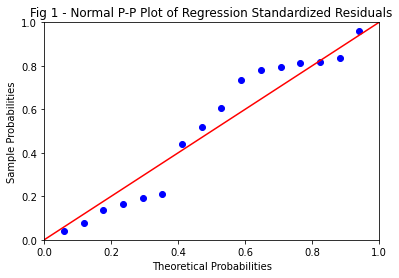

In [12]:
LR_resid = LR_lm.resid
probplot = sm.ProbPlot( LR_resid, fit = True )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [14]:
from scipy.stats import zscore
data['z_score_corruption'] = zscore( data.Corruption_Index )
data[ (data.z_score_corruption > 3.0) | (data.z_score_corruption < -3.0) ]

,Country,Corruption_Index,Gini_Index,z_score_corruption


In [17]:
import numpy as np

pred_y = LR_lm.predict( test_X )
from sklearn.metrics import r2_score, mean_squared_error
np.abs(r2_score(test_y, pred_y))

0.09564052280706992

In [18]:
np.sqrt(mean_squared_error(test_y, pred_y))

21.53262175080755

In [21]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
# Predict the y values
pred_y = LR_lm.predict( test_X )
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( LR_lm,
test_X,
alpha = 0.1) #90 % confidence interval
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'Gini Index': test_X['Gini_Index'],
'pred_y': pred_y,
'pred_y_left': pred_y_low,
'pred_y_right': pred_y_high } )

pred_y_df


,Gini Index,pred_y,pred_y_left,pred_y_right
17,42.7,56.896373,22.252720,91.540026
19,39.4,59.858336,25.963055,93.753617
11,27.5,70.539354,36.239028,104.839680
18,34.2,64.525672,31.059073,97.992270


In [28]:
data.corr()

,Corruption_Index,Gini_Index,z_score_corruption
Corruption_Index,1.00000,-0.46391,1.00000
Gini_Index,-0.46391,1.00000,-0.46391
z_score_corruption,1.00000,-0.46391,1.00000


For every increase in the Gini Index the Corruption Perception Index decrease by -0.46391

The R-squared shows that 13.2% of the variability in the corruption perception index is explained by the Gini index